In [3]:
#pip install pandas
#pip install matplotlib

In [4]:
# Dependencies and Setup
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
#import scipy.stats as stats

In [5]:
%matplotlib notebook

In [6]:
# File to Load
NYC_data1_to_load = "Resources/NYC_Listings1.csv"
NYC_data2_to_load = "Resources/NYC_Listings2.csv"
NYC_data3_to_load = "Resources/NYC_Listings3.csv"
SF_data_to_load = "Resources/SF_Listings.csv"

In [7]:
# Read School and Student Data File and store into Pandas Data Frames
NYC_data1 = pd.read_csv(NYC_data1_to_load)
NYC_data2 = pd.read_csv(NYC_data2_to_load)
NYC_data3 = pd.read_csv(NYC_data3_to_load)
SF_data = pd.read_csv(SF_data_to_load)

SF_data.head()


C:\Users\m246172\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\m246172\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\m246172\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190806030527,2019-08-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.63
1,3850,https://www.airbnb.com/rooms/3850,20190806030527,2019-08-06,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.11
2,5858,https://www.airbnb.com/rooms/5858,20190806030527,2019-08-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.89
3,7918,https://www.airbnb.com/rooms/7918,20190806030527,2019-08-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
4,8142,https://www.airbnb.com/rooms/8142,20190806030527,2019-08-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


In [8]:
#Combine the data into a single dataset
# pd_concat_ny = pd.concat([NYC_data1, NYC_data2, NYC_data3], axis = 1)
# pd_concat_ny.head()
pd_concat_ny = pd.concat(map(pd.read_csv, ['Resources/NYC_Listings1.csv', 'Resources/NYC_Listings1.csv', 'Resources/NYC_Listings1.csv']))
pd_concat_ny.head()

C:\Users\m246172\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3325: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.019080e+13,8/7/19,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.39
1,3647,https://www.airbnb.com/rooms/3647,2.019080e+13,8/6/19,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
2,3831,https://www.airbnb.com/rooms/3831,2.019080e+13,8/6/19,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
3,5022,https://www.airbnb.com/rooms/5022,2.019080e+13,8/6/19,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
4,5099,https://www.airbnb.com/rooms/5099,2.019080e+13,8/6/19,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.60


In [9]:
column_list=list(pd_concat_ny.columns)
column_list

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [62]:
pd_concat_ny.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.499700e+04,4.499700e+04,0.0,0.0,0.0,4.499700e+04,0.0,44958.000000,44958.000000,44997.000000,...,36639.000000,36660.000000,36636.000000,36645.000000,0.0,44997.000000,44997.000000,44997.000000,44997.000000,37425.000000
mean,5.686797e+06,2.019080e+13,NaN,NaN,NaN,1.637317e+07,NaN,6.573936,6.573936,40.729749,...,9.769262,9.796318,9.527760,9.365370,NaN,3.339423,2.428629,0.878259,0.032536,0.865471
std,3.588420e+06,0.000000e+00,NaN,NaN,NaN,1.633455e+07,NaN,51.398370,51.398370,0.052264,...,0.619289,0.577691,0.734361,0.830674,NaN,11.555221,11.390494,2.381418,0.397017,1.203405
min,2.595000e+03,2.019080e+13,NaN,NaN,NaN,2.571000e+03,NaN,0.000000,0.000000,40.499790,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.329047e+06,2.019080e+13,NaN,NaN,NaN,3.010260e+06,NaN,1.000000,1.000000,40.689550,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.090000
50%,5.749889e+06,2.019080e+13,NaN,NaN,NaN,1.017825e+07,NaN,1.000000,1.000000,40.723500,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.320000
75%,8.892174e+06,2.019080e+13,NaN,NaN,NaN,2.523749e+07,NaN,2.000000,2.000000,40.764140,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,1.180000
max,1.220251e+07,2.019080e+13,NaN,NaN,NaN,6.552700e+07,NaN,755.000000,755.000000,40.908040,...,10.000000,10.000000,10.000000,10.000000,NaN,119.000000,119.000000,43.000000,23.000000,14.490000


In [63]:
pd_concat_ny[['bathrooms', 'bedrooms', 'beds', 'accommodates']].dtypes

bathrooms       float64
bedrooms        float64
beds            float64
accommodates      int64
dtype: object

In [64]:
amenities_NY = pd_concat_ny[['neighbourhood', 'bedrooms', 'bathrooms', 'beds']]
amenities_NY.head()
amenities_NY
amenities_NY = amenities_NY.groupby(['neighbourhood']).mean()
amenities_NY['total'] = amenities_NY.apply(lambda row: row.bedrooms + row.bathrooms + row.beds, axis=1)
#amenities_NY
amenities_NY_sort = amenities_NY.sort_values(by=['total'], ascending=False)
amenities_NY_sort.head(10)

,bedrooms,bathrooms,beds,total
neighbourhood,,,,
Tottenville,4.000000,4.000000,6.000000,14.000000
South Beach,3.000000,2.250000,5.750000,11.000000
Throgs Neck,3.000000,2.500000,3.000000,8.500000
Whitestone,2.666667,1.666667,2.666667,7.000000
Castleton Corners,3.500000,1.000000,2.500000,7.000000
Mariners Harbor,2.000000,1.500000,3.000000,6.500000
Tompkinsville,1.500000,1.250000,3.500000,6.250000
Canarsie,1.866667,1.166667,3.200000,6.233333
Great Kills,2.000000,2.000000,2.000000,6.000000


<IPython.core.display.Javascript object>


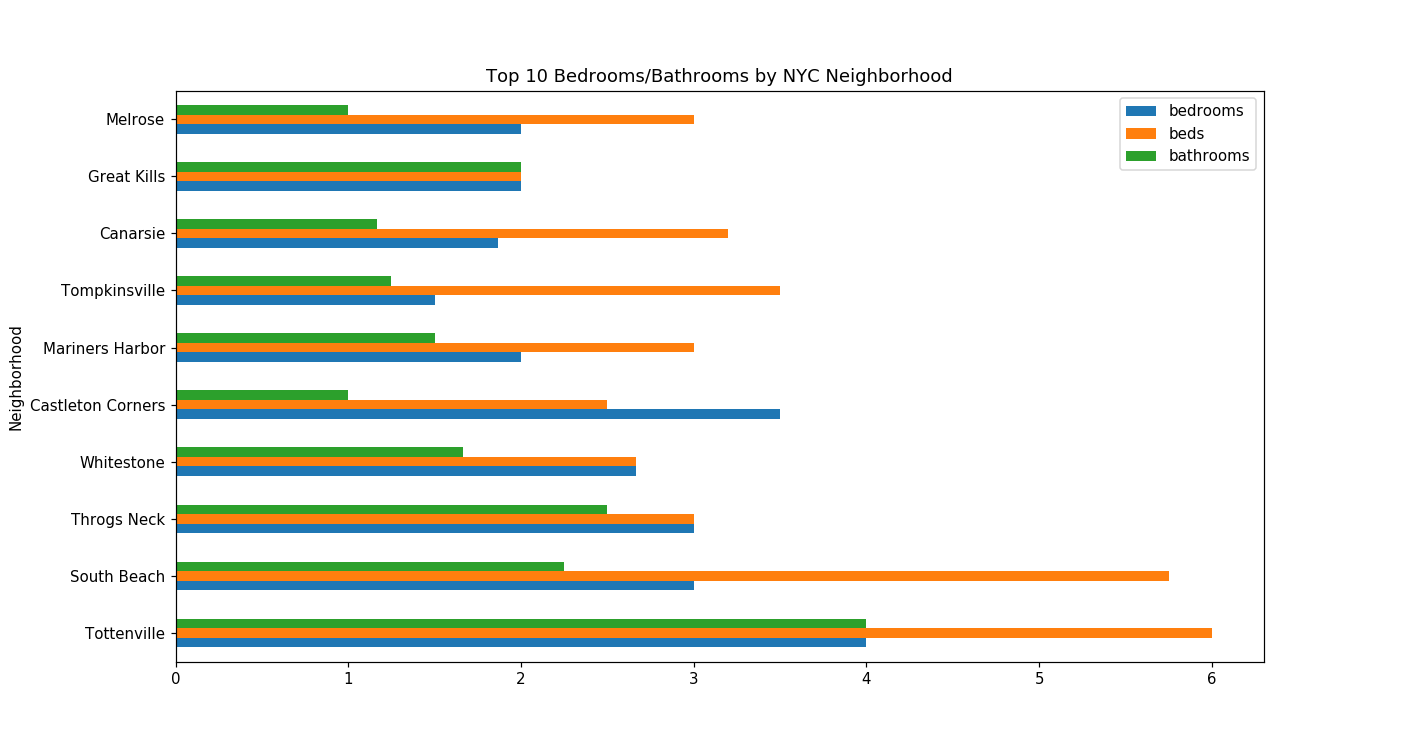

Text(0.5, 1.0, 'Top 10 Bedrooms/Bathrooms by NYC Neighborhood')

In [80]:
#graph neighborhoods with greatest average total of beds, baths
NY_amenities_graph = amenities_NY_sort.head(10).plot.barh(y=['bedrooms', 'beds', 'bathrooms'], figsize=(13, 7), rot=0)
plt.yticks(np.arange(0, 10, 1))
plt.ylabel('Neighborhood')
plt.title('Top 10 Bedrooms/Bathrooms by NYC Neighborhood')

In [96]:
#For neighborhoods with > 39 reviews grab review scores and tally the total and sort by top 5 neighborhoods

price_NY = pd_concat_ny[['neighbourhood', 'bedrooms', 'bathrooms', 'beds']]
#price_NY_mean = price_NY.groupby(['price']).mean() 
price_NY.head()
# ratings_NY
# ratings_NY = ratings_NY.groupby(['neighbourhood']).mean()
# ratings_NY['total review score'] = ratings_NY.apply(lambda row: row.review_scores_cleanliness + row.review_scores_checkin + row.review_scores_communication, axis=1)
# #ratings_NY
# reviewsNY40 =  ratings_NY['number_of_reviews']>39
# ratings_NY_40 = ratings_NY[reviewsGT40]
# # print (ratings_SF_40.shape)
# # ratings_NY_sort = ratings_SF.sort_values(by=['total review score'], ascending=False)
# ratings_NY_sort = ratings_NY_40.sort_values(by=['total review score'], ascending=False)
# ratings_NY_sort.head(5)

,neighbourhood,bedrooms,bathrooms,beds
0,Midtown,0.0,1.0,1.0
1,Harlem,1.0,1.0,1.0
2,Brooklyn,1.0,1.0,4.0
3,East Harlem,NaN,1.0,1.0
4,Midtown East,1.0,1.0,1.0


In [82]:
NY_ratings_graph = ratings_NY_sort.head(5).plot.bar(y=['review_scores_cleanliness', 
                                                       'review_scores_checkin', 
                                                       'review_scores_communication', 
                                                       'review_scores_location'], figsize=(10, 10), stacked = True, rot=0)
plt.yticks(np.arange(0, 45, 5))
plt.ylabel('Reviews')
plt.title('Reviews by Neighborhood')

NameError: name 'ratings_NY_sort' is not defined

In [38]:
SF_Neighborhood_listings = SF_data['neighbourhood'].value_counts().head()

In [32]:
SF_neighborhood_graph = SF_Neighborhood_listings.plot.bar(y=['neighbourhood'], figsize=(14, 10), rot=0)

In [24]:
Total_SF_Neighborhood_listings = SF_data['id'].count()
Total_SF_Neighborhood_listings

7833

In [26]:
NY_Neighborhood_listings = pd_concat_ny['neighbourhood'].value_counts().head()

In [21]:
#how many long term listings are in SF
SF_longterm_listings = SF_data['minimum_nights']>29.count
SF_longterm_listings

SyntaxError: invalid syntax (<ipython-input-21-1cd286af542c>, line 2)

In [84]:
Total_NY_Neighborhood_listings = pd_concat_ny['id'].count()
Total_NY_Neighborhood_listings

44997

In [ ]:
NY_amenities_Y = pd_concat_ny[['neighbourhood', 'bedrooms', 'bathrooms', 'beds', 'accommodates']]
NY_amenities_Y.head()

In [ ]:
amenities_Y.describe()